In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import sklearn
import scipy as sp
import statsmodels as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.utils as vutils
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss

In [2]:
# Data are sorted in ./SuperData
Train_DataX = pd.read_csv("./SuperData/X_train.csv", index_col=0, header=[0,1,2])
Valid_DataX = pd.read_csv("./SuperData/X_valid.csv", index_col=0, header=[0,1,2])
X_Test = pd.read_csv('./SuperData/X_test.csv', index_col=0 , header=[0,1,2])
Train_DataY = pd.read_csv("./task1/Y_train.csv", index_col=0)
Valid_DataY = pd.read_csv("./task1/Y_valid.csv", index_col=0)

In [3]:
Train_DataX.fillna(0, inplace=True)
Valid_DataX.fillna(0, inplace=True)
X_Test.fillna(0, inplace=True)
# print number of rows in Train_DataX
print("Train_DataX has", len(Train_DataX), "rows")

Train_DataX has 16760 rows


In [4]:
# Show size of Train_DataX after dropping columns
Train_DataX.shape

(16760, 7904)

In [5]:
Train_DataX.head()

LEVEL2               alanine aminotransferase                                \
Aggregation Function                     mask                                 
hours_in                                    0    1    2    3    4    5    6   
3_145834_211552                           1.0  0.0  0.0  0.0  0.0  0.0  0.0   
6_107064_228232                           1.0  0.0  0.0  0.0  0.0  0.0  0.0   
9_150750_220597                           0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11_194540_229441                          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12_112213_232669                          0.0  0.0  0.0  0.0  0.0  0.0  0.0   

LEVEL2                               ... white blood cell count urine         \
Aggregation Function                 ...          time_since_measured          
hours_in                7    8    9  ...                           15     16   
3_145834_211552       0.0  0.0  0.0  ...                          7.0    8.0   
6_107064_228232       0.0  0.0  0.0  ...                         31.0   32.0   
9_150750_220597       0.0  0.0  0.0  ...                         55.0   56.0   
11_194540_229441      0.0  0.0  0.0  ...                         79.0   80.0   
12_112213_232669      0.0  0.0  0.0  ...                        103.0  104.0   

LEVEL2                                                                        
Aggregation Function                                                          
hours_in                 17     18     19     20     21     22     23   diff  
3_145834_211552         9.0   10.0   11.0   12.0   13.0   14.0   15.0  100.0  
6_107064_228232        33.0   34.0   35.0   36.0   37.0   38.0   39.0   23.0  
9_150750_220597        57.0   58.0   59.0   60.0   61.0   62.0   63.0   23.0  
11_194540_229441       81.0   82.0   83.0   84.0   85.0   86.0   87.0   23.0  
12_112213_232669      105.0  106.0  107.0  108.0  109.0  110.0  111.0   23.0  

[5 rows x 7904 columns]

In [5]:
# Shuffle the train data let Y = 0 and Y = 1 have same probability
X_Train_0 = Train_DataX[Train_DataY["mort_icu"] == 0]
Y_Train_0 = Train_DataY[Train_DataY["mort_icu"] == 0]
X_Train_1 = Train_DataX[Train_DataY["mort_icu"] == 1]
Y_Train_1 = Train_DataY[Train_DataY["mort_icu"] == 1]

from sklearn.utils import shuffle
np.random.seed(1234)
X_Train_0, Y_Train_0 = shuffle(X_Train_0, Y_Train_0)
X_Train_0_use = X_Train_0[:int(len(X_Train_1)*3)]
Y_Train_0_use = Y_Train_0[:int(len(Y_Train_1)*3)]
X_Train_f = np.concatenate((X_Train_0_use, X_Train_1), axis=0)
Y_Train_f = np.concatenate((Y_Train_0_use, Y_Train_1), axis=0)

In [6]:
# Change each to numpy array
X_train = X_Train_f
X_valid = Valid_DataX.to_numpy()
X_test = X_Test.to_numpy()
Y_train = Y_Train_f
Y_valid = Valid_DataY.to_numpy()

In [8]:
X_train.shape

(4900, 7904)

In [7]:
Y_train = Y_train.ravel()
Y_valid = Y_valid.ravel()

In [19]:
# Logistic Regression
# 4 min
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.8776106934001671
Precision:  0.21224489795918366
Recall:  0.34210526315789475
AUC:  0.7351812291656885


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# SVM
# 6 min
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9365079365079365
Precision:  0.0
Recall:  0.0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC:  0.552787102680877


In [17]:
# KNN 10
# 2s
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9369256474519633
Precision:  1.0
Recall:  0.006578947368421052
AUC:  0.511881426358045


In [21]:
# KNN 100
# 2s
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9365079365079365
Precision:  0.0
Recall:  0.0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC:  0.5306000281703366


In [10]:
# Train X_train and Y_train by Ensemble model on the skewed data
# 6 min
from sklearn.ensemble import VotingClassifier
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# XGBoost
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=1000, max_depth=6, min_child_weight=3, learning_rate=0.04, subsample=0.6, colsample_bytree=1, random_state=3612, eval_metric='auc', n_jobs=5)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9239766081871345
Precision:  0.4305555555555556
Recall:  0.6118421052631579
AUC:  0.9130299544579558


In [10]:
# import gradian boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=1000, max_depth=6, min_samples_split=3, learning_rate=0.04, subsample=0.6, random_state=3612)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9273182957393483
Precision:  0.4236111111111111
Recall:  0.40131578947368424
AUC:  0.872875487112071


In [ ]:
# HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=1000, max_depth=6, min_samples_leaf=3, learning_rate=0.04, random_state=3612)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9273182957393483
Precision:  0.43956043956043955
Recall:  0.5263157894736842
AUC:  0.8970344851870979


In [ ]:
# XGBRFClassifier
model = xgb.XGBRFClassifier(n_estimators=1000, max_depth=6, min_child_weight=3, learning_rate=0.04, subsample=0.6, colsample_bytree=1, random_state=3612, eval_metric='auc', n_jobs=5)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9206349206349206
Precision:  0.4010416666666667
Recall:  0.506578947368421
AUC:  0.881534931217428


In [ ]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.04, random_state=3612)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9223057644110275
Precision:  0.41904761904761906
Recall:  0.5789473684210527
AUC:  0.9071053805342973


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, max_depth=6, min_samples_split=3, random_state=3612, n_jobs=5)
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

Accuracy:  0.9273182957393483
Precision:  0.4236111111111111
Recall:  0.40131578947368424
AUC:  0.872875487112071


In [ ]:
# QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)

# Valid by X_valid and Y_valid
Y_valid_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(Y_valid, Y_valid_pred))
print("Precision: ", precision_score(Y_valid, Y_valid_pred))
print("Recall: ", recall_score(Y_valid, Y_valid_pred))

Y_valid_prob = model.predict_proba(X_valid)[:,1]
print("AUC: ", roc_auc_score(Y_valid, Y_valid_prob))

In [17]:
Y_valid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
# Count number of 1 in Y_valid_pred
print("Y_valid_pred has", sum(Y_valid_pred), "1s")

Y_valid_pred has 237 1s


In [19]:
Y_valid

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
# Count number of 1 in Y_valid
print("Y_valid has", sum(Y_valid), "1s")

Y_valid has 152 1s


In [21]:
# Show the confusion matrix
cm = confusion_matrix(Y_valid, Y_valid_pred)
print(cm)

[[2024  218]
 [ 133   19]]


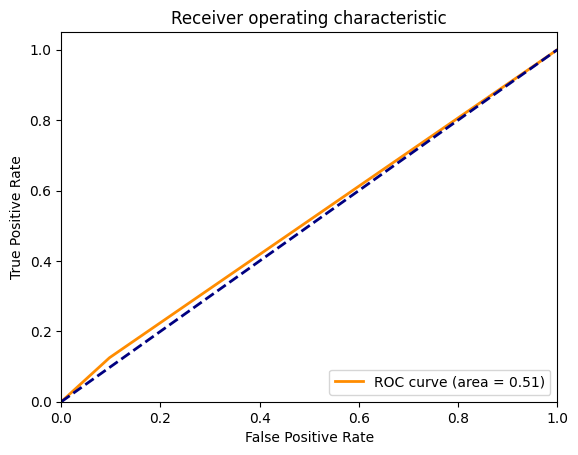

AUC:  0.5138826940231936


In [22]:
# Plot the roc curve
fpr, tpr, thresholds = roc_curve(Y_valid, Y_valid_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC: ", roc_auc)

In [23]:
# if auc > 0.90, output the result by X_test
if roc_auc > 0.90:
    Y_test_prob = model.predict_proba(X_test)[:,1]
    index = X_Test.index
    output = pd.DataFrame(Y_test_prob, columns=['Predicted'], index=index, dtype=float)
    print(output.head())
    output.to_csv('output.csv', index_label='Id')